## We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools to answer questions such as:

- When is electricity consumption typically highest and lowest?
- How do wind and solar power production vary with seasons of the year?
- What are the long-term trends in electricity consumption, solar power, and wind power?
- How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('Data/opsd_germany_daily.csv')
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
data.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [5]:
data.shape

(4383, 5)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
data = data.set_index('Date')
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
# Add columns with year, month, and weekday name
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday
data.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [12]:
# Display a random sampling of 5 rows
data.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


In [26]:
# Time Based Indexing
data.loc['2015-10-02']

Consumption    1391.050
Wind             81.229
Solar           160.641
Wind+Solar      241.870
Year           2015.000
Month            10.000
Weekday           4.000
Name: 2015-10-02 00:00:00, dtype: float64

In [27]:
# Slicing Index
data.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [28]:
# Selecting whole month
data.loc['2016-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-02-01,1533.857,567.769,14.783,582.552,2016,2,0
2016-02-02,1565.493,695.821,25.387,721.208,2016,2,1
2016-02-03,1583.040,534.971,30.859,565.830,2016,2,2
2016-02-04,1588.979,364.409,15.194,379.603,2016,2,3
2016-02-05,1545.368,270.007,22.661,292.668,2016,2,4
2016-02-06,1293.588,412.127,60.225,472.352,2016,2,5
2016-02-07,1209.617,515.967,38.074,554.041,2016,2,6
2016-02-08,1498.211,751.656,32.280,783.936,2016,2,0
2016-02-09,1550.349,614.367,22.971,637.338,2016,2,1


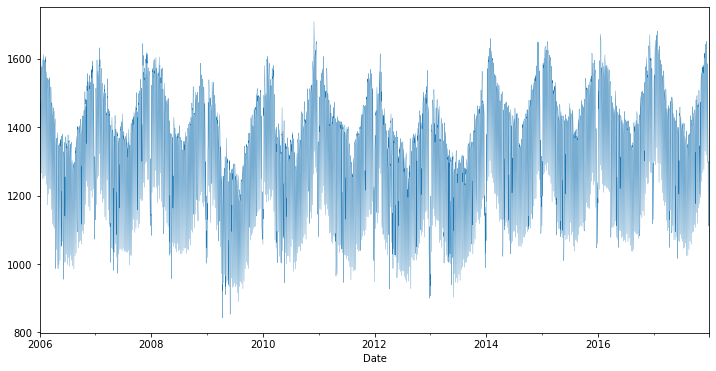

In [36]:
# Plotting
data['Consumption'].plot(figsize = (12,6), linewidth = 0.3)

Text(0, 0.5, 'Daily Consumption (GWh)')

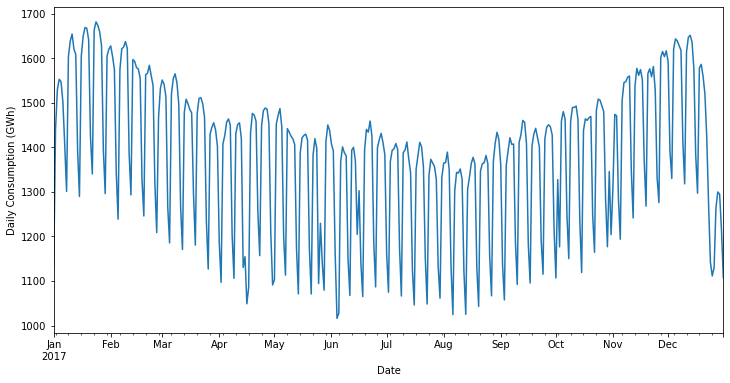

In [39]:
# Daily consumption for 2017
ax = data.loc['2017', 'Consumption'].plot(figsize = (12,6))
ax.set_ylabel("Daily Consumption (GWh)")

`Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.`

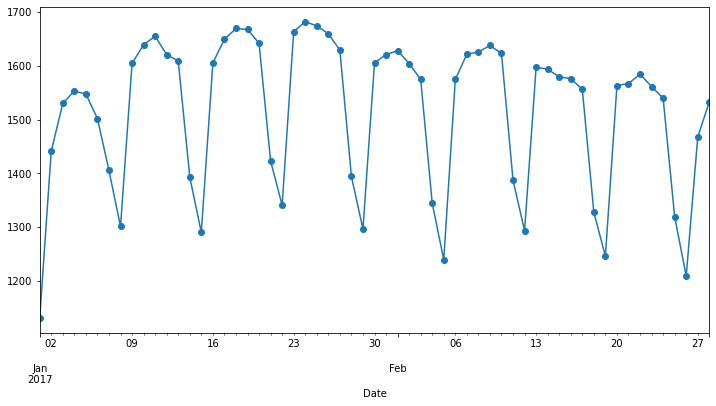

In [52]:
# look at just January and February.
data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', figsize = (12, 6))


`Consumption is highest on weekdays and lowest on weekends.`

### Seasonality

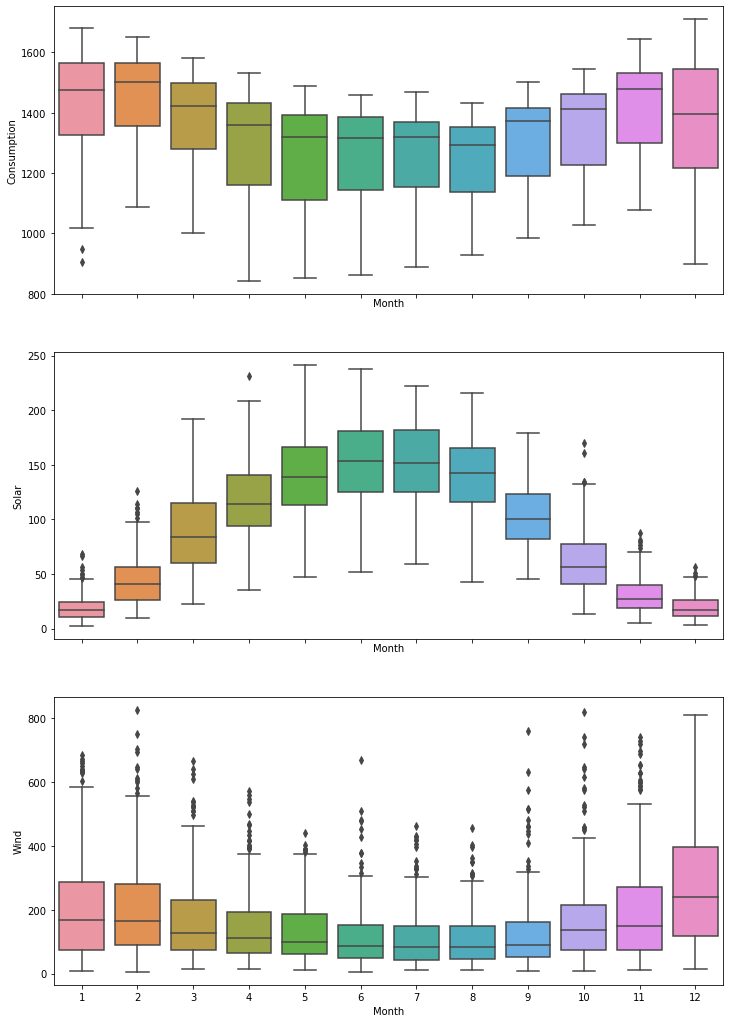

In [65]:
fig, axes = plt.subplots(3, 1, figsize = (12, 18), sharex=True)
for i, j in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data = data, x = 'Month', y = i, ax = j)
    ax.set_ylabel('GWh')
    ax.set_title(i)
plt.show()

#### These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:

* Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.
* While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

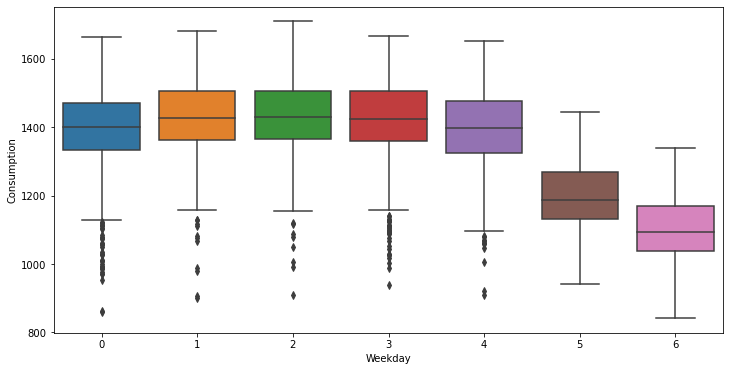

In [70]:
# Group the electricity consumption time series by day of the week, to explore weekly seasonality.
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'Weekday', y = 'Consumption')

`As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.`

### Frequencies

`When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas`

In [78]:
date_range = pd.date_range('2017-09-20', periods=8, freq='D')
date_range

DatetimeIndex(['2017-09-20', '2017-09-21', '2017-09-22', '2017-09-23',
               '2017-09-24', '2017-09-25', '2017-09-26', '2017-09-27'],
              dtype='datetime64[ns]', freq='D')

In [79]:
data.loc[date_range, 'Consumption']

2017-09-20    1442.87787
2017-09-21    1421.64603
2017-09-22    1401.40633
2017-09-23    1191.10345
2017-09-24    1115.07288
2017-09-25    1419.59171
2017-09-26    1445.40606
2017-09-27    1451.00792
Freq: D, Name: Consumption, dtype: float64

In [85]:
# Replacing missing values and taking hourly frequency
new_data = data.loc[date_range, 'Consumption'].copy()
new_data.asfreq('H').fillna(method = 'ffill')

2017-09-20 00:00:00    1442.87787
2017-09-20 01:00:00    1442.87787
2017-09-20 02:00:00    1442.87787
2017-09-20 03:00:00    1442.87787
2017-09-20 04:00:00    1442.87787
                          ...    
2017-09-26 20:00:00    1445.40606
2017-09-26 21:00:00    1445.40606
2017-09-26 22:00:00    1445.40606
2017-09-26 23:00:00    1445.40606
2017-09-27 00:00:00    1451.00792
Freq: H, Name: Consumption, Length: 169, dtype: float64

### Resampling
`It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was downsampled from the original hourly time series. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.`

In [88]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly = data[data_columns].resample('W').mean()
data_weekly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


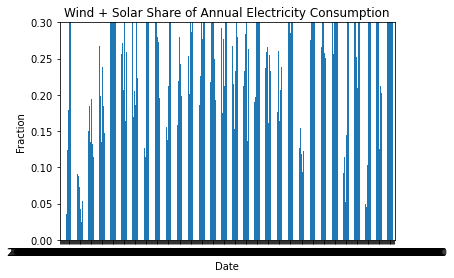

In [98]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
data['Wind+Solar/Consumption'] = (data['Wind']+data['Solar'])/data['Consumption']
ax = data.loc['2017':, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

### Rolling windows

`Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are:`

In [100]:
opsd_7d = data[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


### Trends
`Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.`

In [ ]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');